# LeNet

LeNet (LeNet-5) consists of two parts: (i) a convolutional encoder consisting of two convolutional layers; and (ii) a dense block consisting of three fully-connected layers; The architecture is summarized in

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data() # download the dataset
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [4]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [5]:
x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [7]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 15s 5ms/step - loss: 1.3932 - accuracy: 0.4957 - val_loss: 0.2976 - val_accuracy: 0.9140
Epoch 2/40
907/907 [==============================] - 4s 4ms/step - loss: 0.3542 - accuracy: 0.8884 - val_loss: 0.2136 - val_accuracy: 0.9400
Epoch 3/40
907/907 [==============================] - 4s 4ms/step - loss: 0.2692 - accuracy: 0.9161 - val_loss: 0.1609 - val_accuracy: 0.9530
Epoch 4/40
907/907 [==============================] - 4s 4ms/step - loss: 0.2312 - accuracy: 0.9264 - val_loss: 0.1225 - val_accuracy: 0.9705
Epoch 5/40
907/907 [==============================] - 4s 4ms/step - loss: 0.2028 - accuracy: 0.9356 - val_loss: 0.1548 - val_accuracy: 0.9575
Epoch 6/40
907/907 [==============================] - 4s 4ms/step - loss: 0.1832 - accuracy: 0.9423 - val_loss: 0.1277 - val_accuracy: 0.9640
Epoch 7/40
907/907 [==============================] - 4s 4ms/step - loss: 0.1651 - accuracy: 0.9476 - val_loss: 0.1155 - val_accuracy: 0.9680
Epoch

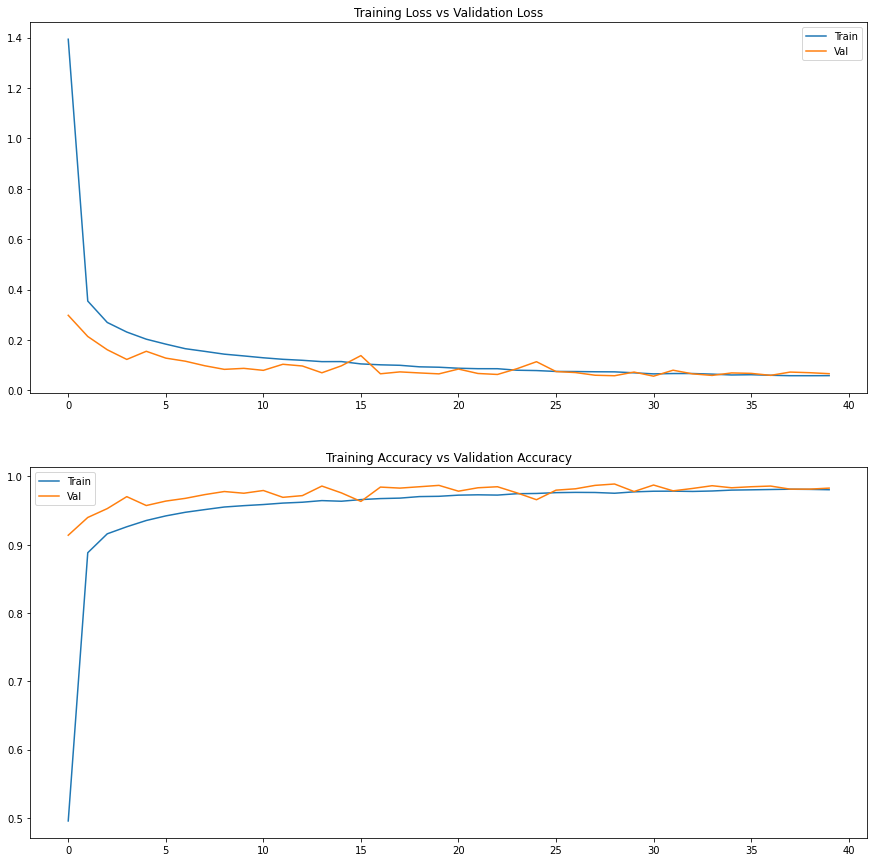

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])


In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0805 - accuracy: 0.9753


[0.08051909506320953, 0.9753000140190125]